In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install umap-learn

## **1. PCA (Principal Component Analysis)**

**Works Well:**

Linear data relationships.

Large datasets (efficient computationally).

Preprocessing for other machine learning models.

Data with a lot of correlated features.

**Limitations:**

Non-linear data structures.

PCA is sensitive to the scale of the data.

In [2]:
import pandas as pd

pca = '/content/drive/My Drive/Data_Mining_CMPE_255/data_emotion.csv'

pca_data = pd.read_csv(pca)

# Display the first few rows of the dataset to confirm correct loading
pca_data.head()

,tempo,onset_env_mean,onset_env_std,onset_env_median,onset_env_min,onset_env_max,spectral_centroid_mean,spectral_centroid_std,spectral_centroid_median,spectral_centroid_min,...,mfcc_max_11,mfcc_max_12,mfcc_max_13,mfcc_max_14,mfcc_max_15,mfcc_max_16,mfcc_max_17,mfcc_max_18,mfcc_max_19,mfcc_max_20
0,0.374243,-0.332760,0.261798,-0.437075,0.0,-1.140906,-0.684409,1.197786,-1.260809,-1.073469,...,-1.432475,-0.066422,-0.952170,-0.696883,-1.270881,-1.176551,-0.282666,-0.846374,-1.076724,-0.577233
1,0.863181,-0.253371,0.924194,-0.251321,0.0,1.607811,-0.911456,0.876178,-1.431539,-1.073469,...,-1.380526,-0.092400,-0.112360,-0.529873,-0.909262,-0.725138,-0.606210,-0.553577,-1.079252,-0.087085
2,-1.043677,-0.585887,-0.363455,0.100917,0.0,-0.007827,-1.642840,1.008973,-2.200055,-1.073469,...,-0.554294,-1.023676,-1.469105,-1.471126,-1.453583,-1.027109,0.083603,-1.269402,-1.281879,-1.050536
3,-0.131701,0.502915,0.963484,0.656464,0.0,0.940466,-1.356109,-0.095697,-0.834611,-1.073469,...,-0.851689,-0.893290,-0.352136,-0.930853,-0.685324,-0.775293,-0.179770,-0.418968,-0.558661,-0.885703
4,0.651308,1.052303,1.631391,0.988971,0.0,0.655991,-1.424718,-0.109878,-0.961047,-1.073469,...,-0.529464,-0.348217,-0.874329,0.264549,-1.045235,-0.386692,-0.337142,-0.500581,-0.165303,-0.397244


In [ ]:
# Displaying the column names to identify the target label
pca_data.columns.tolist()

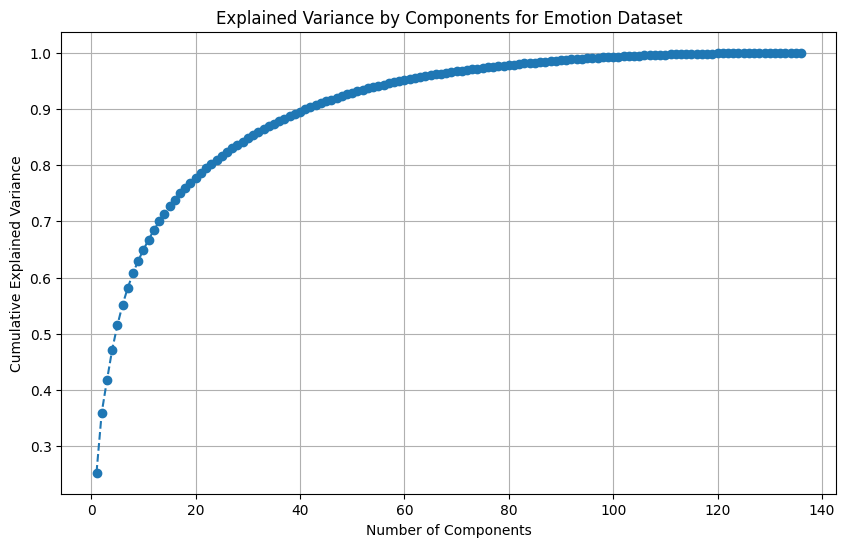

array([0.25292209, 0.35993327, 0.41720717, 0.4716843 , 0.51525175,
       0.55196262, 0.58199343, 0.60808563, 0.63014794, 0.64974574,
       0.66773895, 0.68455173, 0.69985768, 0.71381384, 0.72709358,
       0.73871185, 0.7499898 , 0.75990855, 0.76914059, 0.77786466,
       0.78612105, 0.79409682, 0.8017481 , 0.80923128, 0.81644319,
       0.82322098, 0.82983809, 0.83617897, 0.84208326, 0.84794209,
       0.85362738, 0.85909203, 0.86419451, 0.86906293, 0.87384634,
       0.87848136, 0.88297182, 0.8871607 , 0.89123742, 0.89524237,
       0.89910665, 0.90284616, 0.90645229, 0.90992148, 0.91329772,
       0.91661935, 0.91976914, 0.92287089, 0.92576378, 0.92857346,
       0.93126973, 0.9339383 , 0.93652028, 0.93891215, 0.941144  ,
       0.94333664, 0.94540851, 0.94742205, 0.94940846, 0.95133911,
       0.9531764 , 0.95491603, 0.95662066, 0.9582853 , 0.95985771,
       0.96138453, 0.96282988, 0.96424159, 0.9655705 , 0.96687344,
       0.96812555, 0.96933611, 0.97052348, 0.9716698 , 0.97279

In [30]:
from sklearn.decomposition import PCA

# Separating features and the target label
X_emotion = pca_data.drop('emotion', axis=1)
y_emotion = pca_data['emotion']

# Standardizing the Features
scaler_emotion = StandardScaler()
X_emotion_scaled = scaler_emotion.fit_transform(X_emotion)

# Performing PCA
pca_emotion = PCA()
X_emotion_pca = pca_emotion.fit_transform(X_emotion_scaled)

# Explained variance
explained_variance_emotion = pca_emotion.explained_variance_ratio_

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_emotion) + 1), explained_variance_emotion.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components for Emotion Dataset')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

explained_variance_emotion.cumsum()  # Displaying the cumulative explained variance for each component

In [31]:
# Performing PCA with 64 components
pca_64 = PCA(n_components=64)
X_emotion_pca_64 = pca_64.fit_transform(X_emotion_scaled)

# Explained variance with 64 components
explained_variance_64 = pca_64.explained_variance_ratio_.cumsum()[-1]

# Creating a DataFrame for the PCA-transformed data
X_emotion_pca_64_df = pd.DataFrame(X_emotion_pca_64, columns=[f'PC{i+1}' for i in range(64)])
X_emotion_pca_64_df['emotion'] = y_emotion

# Showing the variance explained and the first few rows of the new DataFrame
explained_variance_64, X_emotion_pca_64_df.head()

(0.9582222032196055,
         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
 0  0.867809 -6.352005 -1.183600 -1.462884  3.960676 -0.448305  1.608739   
 1  2.673621 -6.487100 -0.262302 -0.542100  3.529414 -0.915249  2.043975   
 2  2.701698 -7.711777  0.601570 -1.524105  4.634315 -1.809687  1.364455   
 3  3.048735 -4.544943  1.271898 -0.372031  2.868421 -0.459500  1.735343   
 4  2.500823 -4.833225  2.105431 -0.516897  3.591381 -0.727571  3.076564   
 
         PC8       PC9      PC10  ...      PC56      PC57      PC58      PC59  \
 0  0.578589  1.645845  0.382206  ... -0.642447  0.158624  0.087052  0.521734   
 1 -0.745037  2.550193  0.339881  ... -0.357273  0.085173 -0.154033 -0.354231   
 2 -0.433596  2.123399  1.297335  ... -0.183697 -0.191018 -0.199631  0.208067   
 3 -1.370206  1.943733 -0.018738  ... -0.626804 -0.350657  0.262813 -0.693872   
 4 -0.023850  2.040637 -0.923346  ... -0.174812 -0.442484  1.167454 -0.691844   
 
        PC60      PC61      PC62 

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


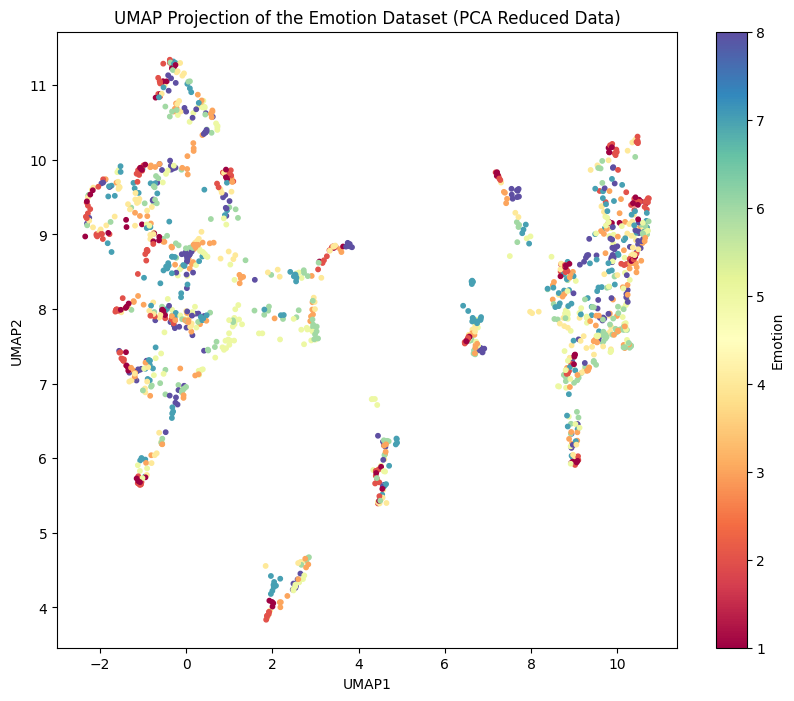

In [34]:
import umap
import matplotlib.pyplot as plt

# Assuming X_emotion_pca_64_df is your PCA-reduced DataFrame and y_emotion is the target label

# Configuring UMAP
reducer = umap.UMAP(n_neighbors=15, n_components=3, metric='euclidean', random_state=42)

# Applying UMAP to the PCA-reduced data
X_umap = reducer.fit_transform(X_emotion_pca_64_df.drop('emotion', axis=1))

# Plotting the UMAP visualization
plt.figure(figsize=(10, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_emotion, cmap='Spectral', s=10)
plt.colorbar(label='Emotion')
plt.title('UMAP Projection of the Emotion Dataset (PCA Reduced Data)')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

## **2. SVD (Singular Value Decomposition)**

**Works Well:**

Similar applications as PCA.

Data compression and noise reduction.

Matrix inversion problems.

**Limitations:**

Non-linear data structures.

Computationally intensive for very large matrices.



In [43]:
file = '/content/drive/MyDrive/Data_Mining_CMPE_255/HouseListings-Top45Cities-10292023-kaggle.csv'

# Attempting to read the file with an alternative encoding (ISO-8859-1)
try:
    svd_data = pd.read_csv(file, encoding='ISO-8859-1')
except Exception as e:
    error_message = str(e)
    data_houses = None

# Displaying the first few rows of the dataset if loaded successfully, otherwise show the error message
svd_data.head() if svd_data is not None else error_message


,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0


In [45]:
# Dropping 'Address' and 'City' columns
data_houses_reduced = svd_data.drop(['Address', 'City'], axis=1)

# Checking for missing values
missing_values = data_houses_reduced.isna().sum()

# Displaying the count of missing values in each column
missing_values

Price                   0
Number_Beds             0
Number_Baths            0
Province                0
Population              0
Latitude                0
Longitude               0
Median_Family_Income    0
dtype: int64

In [46]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding the 'Province' column
encoder = OneHotEncoder(sparse=False)
province_encoded = encoder.fit_transform(data_houses_reduced[['Province']])

# Creating a DataFrame for the encoded provinces
province_encoded_df = pd.DataFrame(province_encoded, columns=encoder.get_feature_names_out(['Province']))

# Concatenating the encoded columns with the original data
data_houses_encoded = pd.concat([data_houses_reduced.drop('Province', axis=1), province_encoded_df], axis=1)

# Displaying the first few rows of the transformed dataset
data_houses_encoded.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Price,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income,Province_Alberta,Province_British Columbia,Province_Manitoba,Province_New Brunswick,Province_Newfoundland and Labrador,Province_Nova Scotia,Province_Ontario,Province_Quebec,Province_Saskatchewan
0,779900.0,3,2,5647656,43.7417,-79.3733,97000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,799999.0,3,1,5647656,43.7417,-79.3733,97000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,799900.0,2,2,5647656,43.7417,-79.3733,97000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1200000.0,4,2,5647656,43.7417,-79.3733,97000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,668800.0,1,1,5647656,43.7417,-79.3733,97000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [55]:
from sklearn.decomposition import TruncatedSVD
import pandas as pd

# Separating features and the target label
X_houses = data_houses_encoded.drop('Price', axis=1)
y_houses = data_houses_encoded['Price']

# Performing SVD
n_components_svd = 3
svd = TruncatedSVD(n_components=n_components_svd)
X_houses_svd = svd.fit_transform(X_houses)

# Singular values
singular_values = svd.singular_values_

# Explained variance ratio
explained_variance_ratio_svd = svd.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio_svd.cumsum()

# Creating a DataFrame for the SVD-applied data
X_houses_svd_df = pd.DataFrame(X_houses_svd, columns=[f'SVD_Component_{i+1}' for i in range(n_components_svd)])
X_houses_svd_df['Price'] = y_houses

# Displaying the singular values and cumulative explained variance
print(singular_values)
print(cumulative_explained_variance)

# Displaying the first few rows of the SVD-applied DataFrame
X_houses_svd_df.head()

[2.43743760e+08 1.47563029e+07 5.14491398e+03]
[0.99872085 1.         1.        ]


,SVD_Component_1,SVD_Component_2,SVD_Component_3,Price
0,5.647531e+06,-104017.434378,12.396194,779900.0
1,5.647531e+06,-104017.434407,12.401027,799999.0
2,5.647531e+06,-104017.434416,12.399964,799900.0
3,5.647531e+06,-104017.434341,12.392425,1200000.0
4,5.647531e+06,-104017.434482,12.408566,668800.0


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


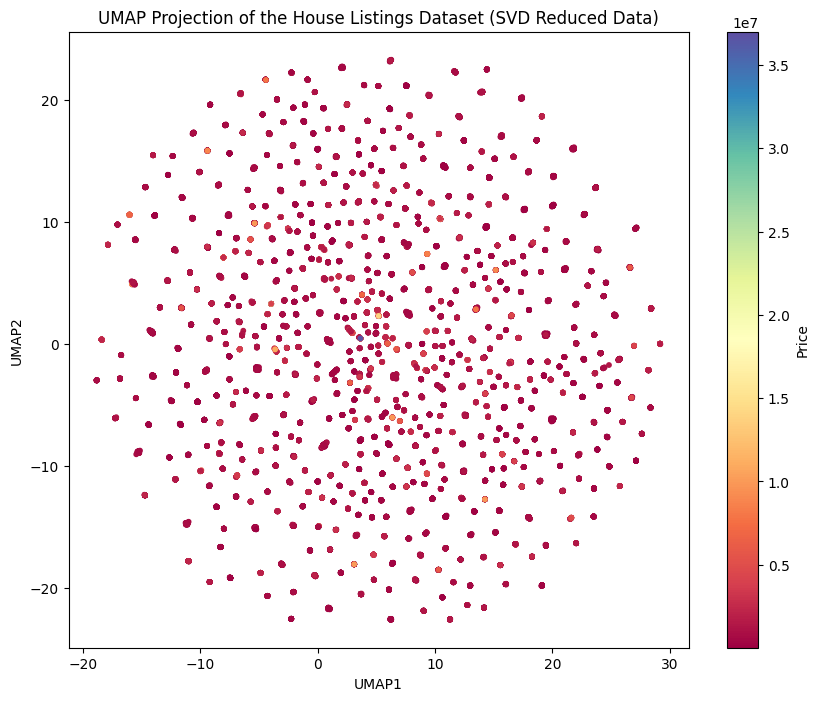

In [56]:
import umap
import matplotlib.pyplot as plt

# Assuming X_houses_svd_df is your SVD-applied DataFrame

# Configuring UMAP
reducer_svd = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean', random_state=42)

# Applying UMAP to the SVD-reduced data (excluding the target column 'Price')
X_umap_svd = reducer_svd.fit_transform(X_houses_svd_df.drop('Price', axis=1))

# Plotting the UMAP visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap_svd[:, 0], X_umap_svd[:, 1], c=X_houses_svd_df['Price'], cmap='Spectral', s=10)
plt.colorbar(scatter, label='Price')
plt.title('UMAP Projection of the House Listings Dataset (SVD Reduced Data)')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

## **3. MDS (Multidimensional Scaling)**

**Works Well:**

Visualizing similarities or dissimilarities in data.

Data where preserving the distance between points is crucial.

**Limitations:**

Large datasets (can be computationally intensive).

MDS assumes a linear relationship in the dataset.

In [35]:
import pandas as pd

File = '/content/drive/MyDrive/Data_Mining_CMPE_255/fake_bills.csv'

# Reload the dataset with the correct delimiter
mds_data = pd.read_csv(File, delimiter=';')

# Display the first few rows of the dataset to confirm correct loading
mds_data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [36]:
# Checking for NaN values in the dataset
nan_info = mds_data.isna().sum()

# Displaying the count of NaN values in each column
nan_info

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

scaler = StandardScaler()

# Separating features and the target label
X = mds_data.drop('is_genuine', axis=1)
y = mds_data['is_genuine']

# Imputing missing values with the median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Standardizing the imputed data
X_scaled = scaler.fit_transform(X_imputed)

In [38]:
from sklearn.manifold import MDS

mds = MDS(n_components=3, random_state=42)

# Applying MDS to the scaled and imputed data
X_mds = mds.fit_transform(X_scaled)

# Converting the results into a DataFrame for easier plotting
X_mds_df = pd.DataFrame(X_mds, columns=['MDS1', 'MDS2', 'MDS3'])

# Adding the target variable for color-coding in the plot
X_mds_df['is_genuine'] = y.values

X_mds_df.head()  # Displaying the first few rows of the transformed data

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


,MDS1,MDS2,MDS3,is_genuine
0,-3.197574,-0.750935,2.967541,True
1,3.191115,0.600878,0.248824,True
2,-2.263990,2.495721,0.148453,True
3,1.988688,0.202245,1.741552,True
4,-0.233464,-0.509405,2.188785,True


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


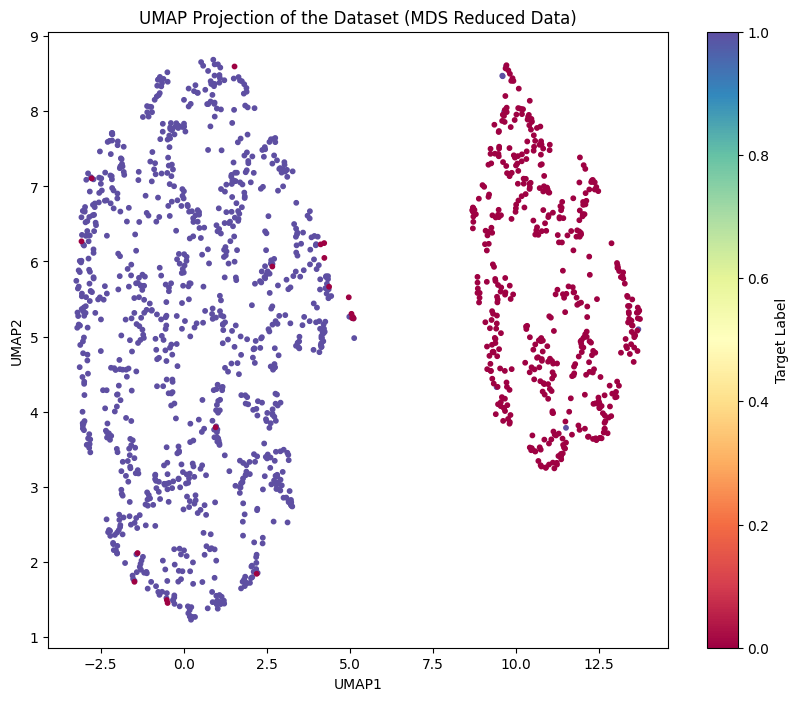

In [39]:
import umap
import matplotlib.pyplot as plt

# Configuring UMAP
reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean', random_state=42)

# Applying UMAP to the MDS-reduced data
X_umap_mds = reducer.fit_transform(X_mds)

# Plotting the UMAP visualization
plt.figure(figsize=(10, 8))
plt.scatter(X_umap_mds[:, 0], X_umap_mds[:, 1], c=y, cmap='Spectral', s=10)
plt.colorbar(label='Target Label')
plt.title('UMAP Projection of the Dataset (MDS Reduced Data)')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

## **4. ISOMap (Isometric Mapping)**

**Works Well:**

Unfolding non-linear manifolds.

Data where global geometry (geodesic distances) is important.

**Limitations:**

Noisy datasets.

Datasets with missing values.

Computationally intensive, especially with large neighborhood sizes.

In [14]:
import pandas as pd

# Load the dataset with no header and providing dummy column names
num_columns = len(pd.read_csv('/content/drive/MyDrive/Data_Mining_CMPE_255/ionosphere.csv', nrows=1).columns)
column_names = ['feature_' + str(i) for i in range(num_columns - 1)] + ['target']
data = pd.read_csv('/content/drive/MyDrive/Data_Mining_CMPE_255/ionosphere.csv', header=None, names=column_names)

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import Isomap

X = data.drop('target', axis=1)
y = data['target']

# Standardizing the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Isomap parameters
n_neighbors_options = [5, 15, 30]  # Example values for n_neighbors
n_components_options = [2, 3]      # Example values for n_components

# Applying Isomap with different hyperparameters
isomap_results = {}
for n_neighbors in n_neighbors_options:
    for n_components in n_components_options:
        isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
        X_isomap = isomap.fit_transform(X_scaled)
        key = f'n_neighbors={n_neighbors}, n_components={n_components}'
        isomap_results[key] = X_isomap

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
<ipython-input-17-1bf9d128d170>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='Spectral', s=10)


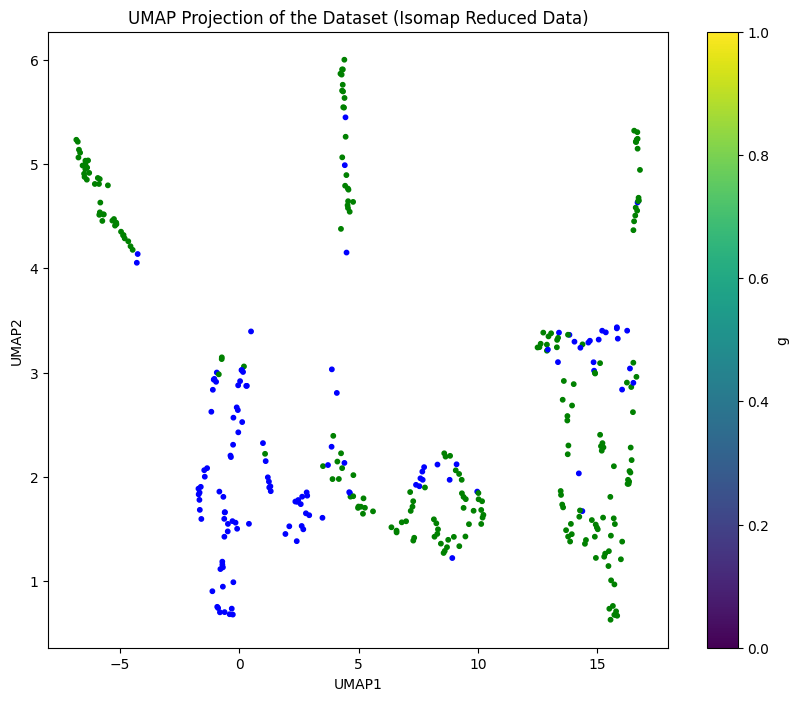

In [17]:
import umap
import matplotlib.pyplot as plt

# Choose one of the Isomap results for visualization, e.g., n_neighbors=5, n_components=2
X_isomap_selected = isomap_results['n_neighbors=5, n_components=2']

# Configuring UMAP
reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean', random_state=42)

# Applying UMAP to the selected Isomap results
X_umap = reducer.fit_transform(X_isomap_selected)

# Plotting the UMAP visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='Spectral', s=10)
plt.colorbar(scatter, label='g')
plt.title('UMAP Projection of the Dataset (Isomap Reduced Data)')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

## **5. LLE (Locally Linear Embedding)**

**Works Well:**

Unfolding non-linear manifolds.

Preserving local relationships in the data.

**Limitations:**

Doesn't handle global relationships as well.

Sensitive to noise and outliers.

Computationally intensive for large datasets.

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data_lle = pd.read_csv('/content/drive/MyDrive/Data_Mining_CMPE_255/winequality-red.csv')

data_lle.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [32]:
# Separating features and the target variable
X = data_lle.drop('quality' , axis=1)
y = data_lle['quality']

# Standardizing the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
from sklearn.manifold import LocallyLinearEmbedding

# LLE parameters for tuning
n_neighbors_options = [5, 10, 15]  # Example values for n_neighbors
n_components_options = [2, 3]      # Example values for n_components

# Applying LLE with different hyperparameters
lle_results = {}
for n_neighbors in n_neighbors_options:
    for n_components in n_components_options:
        lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components)
        X_lle = lle.fit_transform(X_scaled)
        key = f'n_neighbors={n_neighbors}, n_components={n_components}'
        lle_results[key] = X_lle

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


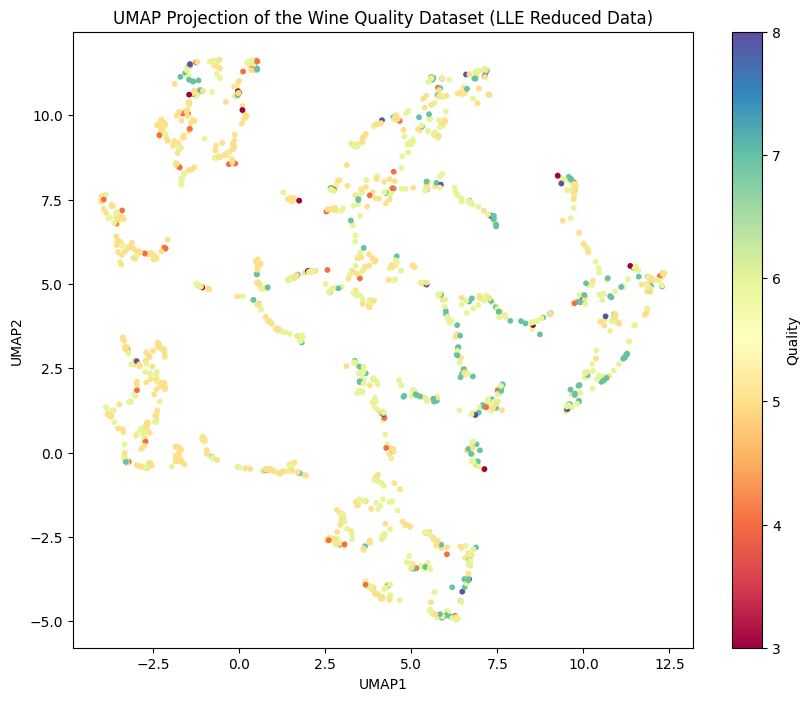

In [34]:
import umap
import matplotlib.pyplot as plt

# Choose one of the LLE results for visualization, e.g., n_neighbors=10, n_components=2
X_lle_selected = lle_results['n_neighbors=10, n_components=2']

# Configuring UMAP
reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean', random_state=42)

# Applying UMAP to the selected LLE results
X_umap = reducer.fit_transform(X_lle_selected)

# Plotting the UMAP visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='Spectral', s=10)
plt.colorbar(scatter, label='Quality')
plt.title('UMAP Projection of the Wine Quality Dataset (LLE Reduced Data)')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

## **6. UMAP (Uniform Manifold Approximation and Projection)**

**Works Well:**

Large datasets (more scalable than t-SNE).

Both linear and non-linear structures.

Preserving local and global data structure.

**Limitations:**

Interpretability can be challenging.

Parameter tuning can significantly affect the results.

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Data_Mining_CMPE_255/linear-regression-boston-house-prices.csv')

# Separating features and the target variable
X = data.drop('MEDV', axis=1)  # Replace 'MEDV' with the actual name of your target column, if different
y = data['MEDV']

# Standardizing the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
import umap

# UMAP parameters for tuning
n_neighbors_options = [5, 15, 30]  # Example values for n_neighbors
min_dist_options = [0.1, 0.5, 0.99]  # Example values for min_dist

# Applying UMAP with different hyperparameters
umap_results = {}
for n_neighbors in n_neighbors_options:
    for min_dist in min_dist_options:
        reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2, random_state=42)
        X_umap = reducer.fit_transform(X_scaled)
        key = f'n_neighbors={n_neighbors}, min_dist={min_dist}'
        umap_results[key] = X_umap

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} over

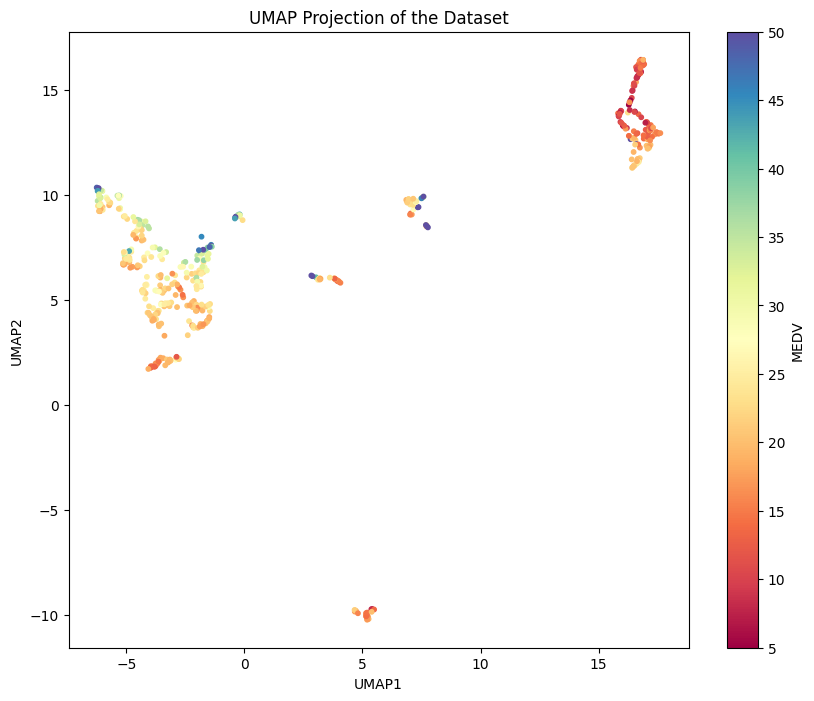

In [20]:
import matplotlib.pyplot as plt

# Choose one of the UMAP results for visualization, e.g., n_neighbors=15, min_dist=0.1
X_umap_selected = umap_results['n_neighbors=15, min_dist=0.1']

# Plotting the UMAP visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap_selected[:, 0], X_umap_selected[:, 1], c=y, cmap='Spectral', s=10)
plt.colorbar(scatter, label='MEDV')
plt.title('UMAP Projection of the Dataset')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

## **7. t-SNE (t-Distributed Stochastic Neighbor Embedding)**

**Works Well:**

Visualizing clusters in high-dimensional data.

Data where local relationships are more important than global.

**Limitations:**

Not ideal for very large datasets (computationally intensive).

Does not preserve global structures as well as local ones.

The results can vary significantly based on hyperparameter choices (e.g., perplexity).

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data_train = pd.read_csv('/content/drive/MyDrive/Data_Mining_CMPE_255/Train.csv')

# Separating features and the target label
# Assuming 'fall' is your target variable and 'Unnamed: 0', 'label' are to be excluded
X_train = data_train.drop(['fall', 'Unnamed: 0', 'label'], axis=1)
y_train = data_train['fall']

# Standardizing the Features
scaler_train = StandardScaler()
X_train_scaled = scaler_train.fit_transform(X_train)

In [11]:
from sklearn.manifold import TSNE

# t-SNE parameters
n_components_tsne = 2  # Number of dimensions to project onto
perplexity_values = [30, 50, 100]  # Example perplexity values for t-SNE

# Applying t-SNE with different perplexity values
tsne_results = {}
for perplexity in perplexity_values:
    tsne = TSNE(n_components=n_components_tsne, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_train_scaled)
    key = f'perplexity={perplexity}'
    tsne_results[key] = X_tsne

In [12]:
tsne_results

{'perplexity=30': array([[ 28.692202 ,  12.2538805],
        [ 20.144178 ,   0.7649461],
        [ 55.71094  ,  -9.222862 ],
        ...,
        [-23.354235 ,  14.312828 ],
        [-32.99961  , -16.72806  ],
        [-30.933432 ,  30.871164 ]], dtype=float32),
 'perplexity=50': array([[ 22.956057 ,   7.805198 ],
        [ 17.812408 ,   2.2529988],
        [ 42.831783 ,  -6.4838605],
        ...,
        [-17.007729 ,  11.649321 ],
        [-26.792034 , -10.333537 ],
        [-20.860415 ,  21.975658 ]], dtype=float32),
 'perplexity=100': array([[ 15.100334  ,   3.1216054 ],
        [ 11.322623  ,  -0.94934076],
        [ 25.927076  ,  -6.233187  ],
        ...,
        [ -9.820939  ,   8.965371  ],
        [-17.546474  ,  -2.0387514 ],
        [-10.385188  ,  13.110587  ]], dtype=float32)}

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


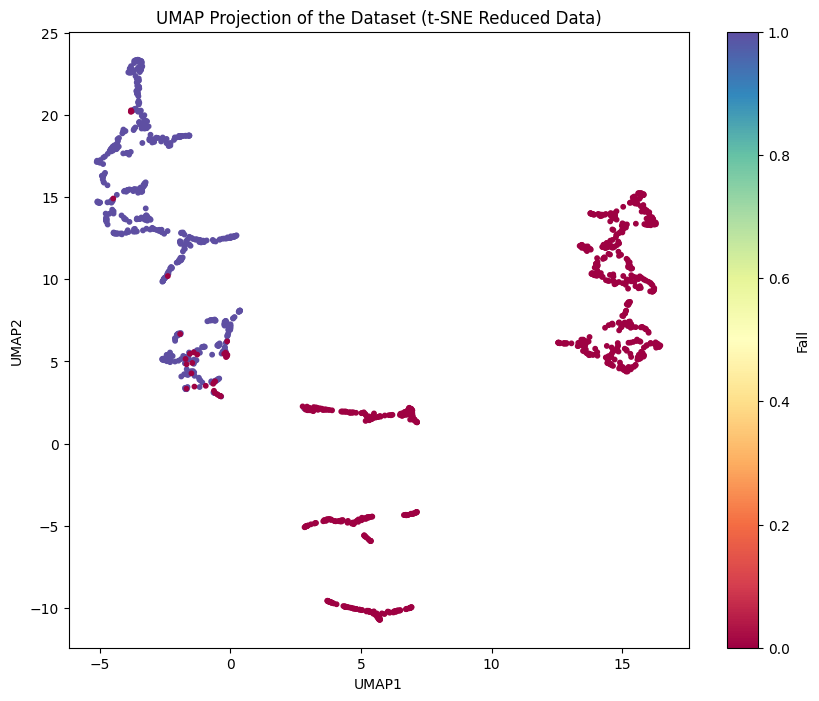

In [10]:
import umap
import matplotlib.pyplot as plt

X_tsne_selected = tsne_results['perplexity=30']

# Configuring UMAP
reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean', random_state=42)

# Applying UMAP to the selected t-SNE results
X_umap = reducer.fit_transform(X_tsne_selected)

# Plotting the UMAP visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_train, cmap='Spectral', s=10)
plt.colorbar(scatter, label='Fall')
plt.title('UMAP Projection of the Dataset (t-SNE Reduced Data)')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()